# MNIST

In [1]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

Using Theano backend.


In [2]:
net = Network("MNIST")
net.add(Layer("input", shape=784, vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Layer("hidden1", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("hidden2", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("output", shape=10, activation='softmax'))

net.connect('input', 'hidden1')
net.connect('hidden1', 'hidden2')
net.connect('hidden2', 'output')

In [3]:
net.compile(loss='mean_squared_error',
            optimizer='sgd')

In [4]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

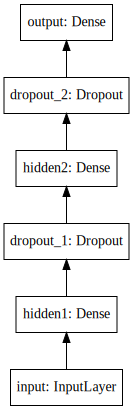

In [5]:
SVG(model_to_dot(net.model, rankdir="BT").create_svg())

In [6]:
from conx import Dataset

In [10]:
dataset = Dataset.get_mnist()
dataset.slice(0, 100)
dataset.reshape_inputs(784)
dataset.shuffle()

Slicing dataset 0:100...
Input Summary:
   count  : 100
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 100
   shape  : (10,)
   range  : (0.0, 1.0)
Input Summary:
   count  : 100
   shape  : (784,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 100
   shape  : (10,)
   range  : (0.0, 1.0)
Shuffled all 100 inputs


In [14]:
net.set_dataset(dataset)

In [15]:
widget = net.dashboard()

<IPython.core.display.Javascript object>

In [16]:
widget

In [17]:
net.train(100, verbose=0)
#net.test()

(100, 0.09107692539691925, 0.079999998211860657, 0.0)

In [19]:
%%time
for i in range(100):
    net.propagate(net.dataset.inputs[i])

CPU times: user 7.22 s, sys: 336 ms, total: 7.55 s
Wall time: 7.36 s


In [20]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

In [21]:
net = Network("MNIST-CNN")
net.add(Layer("input", (28,28,1), colormap="hot", minmax=(0,1)))
net.add(Conv2DLayer("Conv2D-1", 16, (5,5), activation="relu"))
net.add(MaxPool2DLayer("maxpool1", (2,2)))
net.add(Conv2DLayer("Conv2D-2", 132, (5,5), activation="relu")) 
net.add(MaxPool2DLayer("maxpool2", (2,2)))
net.add(FlattenLayer("flatten", visible=False))
net.add(Layer("hidden", 1000, activation='relu', vshape=(8,125), image_maxdim=500))
net.add(Layer("output", 10, activation='softmax'))

net.connect()

In [22]:
net.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [23]:
ds = Dataset.get_mnist()

In [24]:
ds.slice(100)

Slicing dataset 0:100...
Input Summary:
   count  : 100
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 100
   shape  : (10,)
   range  : (0.0, 1.0)


In [25]:
net.set_dataset(ds)

In [26]:
net.train()

Training...
Epoch 1/1
100/100 [==============================] - 0s - loss: 0.3265 - acc: 0.9000
Epoch #    1 | train error 0.32652 | train accuracy 0.90000 | validate% 0.00000


In [27]:
net.dashboard()

<IPython.core.display.Javascript object>

In [28]:
for i in range(10):
    net.propagate(net.dataset.inputs[i])

In [29]:
net.train(epochs=100, accuracy=.7)

Training...
Epoch #    2 | train error 0.28347 | train accuracy 0.90000 | validate% 0.00000
Epoch #    3 | train error 0.27099 | train accuracy 0.91300 | validate% 0.00000
Epoch #    4 | train error 0.22460 | train accuracy 0.91900 | validate% 0.09000
Epoch #    5 | train error 0.14132 | train accuracy 0.94700 | validate% 0.22000
Epoch #    6 | train error 0.18786 | train accuracy 0.93900 | validate% 0.15000
Epoch #    7 | train error 0.13103 | train accuracy 0.95400 | validate% 0.44000
Epoch #    8 | train error 0.06868 | train accuracy 0.97800 | validate% 0.44000
Epoch #    9 | train error 0.06818 | train accuracy 0.97900 | validate% 0.56000
Epoch #   10 | train error 0.10332 | train accuracy 0.95400 | validate% 0.34000
Epoch #   11 | train error 0.07897 | train accuracy 0.97400 | validate% 0.59000
Epoch #   12 | train error 0.04024 | train accuracy 0.99100 | validate% 0.71000
Epoch #   12 | train error 0.04024 | train accuracy 0.99100 | validate% 0.71000
